In [1]:
import pandas as pd

# load the training dataset
!python -m wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
penguins = pd.read_csv('penguins.csv')

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample


Saved under penguins.csv


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
340,43.5,18.1,202.0,3400.0,2
59,37.6,19.1,194.0,3750.0,0
52,35.0,17.9,190.0,3450.0,0
37,42.2,18.5,180.0,3550.0,0
223,46.4,15.6,221.0,5000.0,1
335,45.6,19.4,194.0,3525.0,2
329,50.7,19.7,203.0,4050.0,2
320,50.9,17.9,196.0,3675.0,2
47,37.5,18.9,179.0,2975.0,0
195,49.6,15.0,216.0,4750.0,1


The 'Species' column is the label we want to train a model to predict.
This dataset includes 3 possible species, encoded as 0, 1 and 2.

In [2]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName


In [10]:
for index, row in penguins.sample(10).iterrows():
    print(penguin_classes[int(row[4])], '[', row[0], row[1], row[2], row[3], row[4], ']')

Adelie [ 39.2 21.1 196.0 4150.0 0.0 ]
Gentoo [ 46.5 13.5 210.0 4550.0 1.0 ]
Adelie [ 40.6 18.6 183.0 3550.0 0.0 ]
Adelie [ 37.5 18.9 179.0 2975.0 0.0 ]
Adelie [ 36.6 17.8 185.0 3700.0 0.0 ]
Gentoo [ 59.6 17.0 230.0 6050.0 1.0 ]
Adelie [ 37.2 19.4 184.0 3900.0 0.0 ]
Adelie [ 35.6 17.5 191.0 3175.0 0.0 ]
Chinstrap [ 46.5 17.9 192.0 3500.0 2.0 ]
Gentoo [ 45.4 14.6 211.0 4800.0 1.0 ]


In [6]:
penguins.sample(10)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
323,49.0,19.6,212.0,4300.0,2
160,43.3,13.4,209.0,4400.0,1
154,48.7,14.1,210.0,4450.0,1
176,42.9,13.1,215.0,5000.0,1
339,55.8,19.8,207.0,4000.0,2
134,38.1,17.6,187.0,3425.0,0
77,37.2,19.4,184.0,3900.0,0
175,46.3,15.8,215.0,5050.0,1
98,33.1,16.1,178.0,2900.0,0
166,45.8,14.6,210.0,4200.0,1


In [11]:
penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.755814
std,5.459584,1.974793,14.061714,801.954536,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [15]:
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [19]:
# Show rows containing nulls
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


In [20]:
penguins = penguins.dropna()

In [18]:
# Check there are now no nulls
enguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

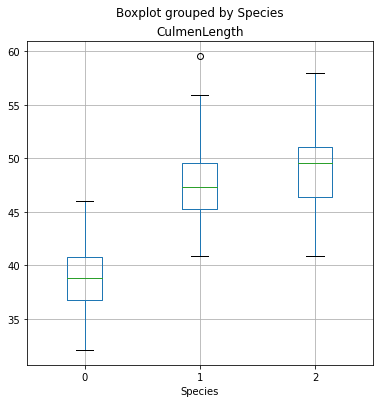

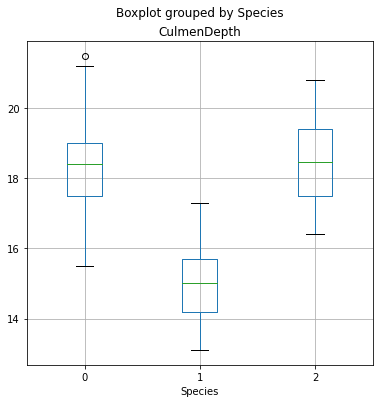

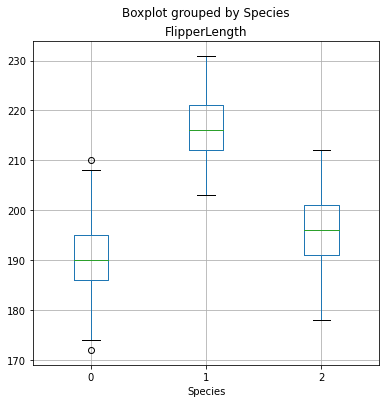

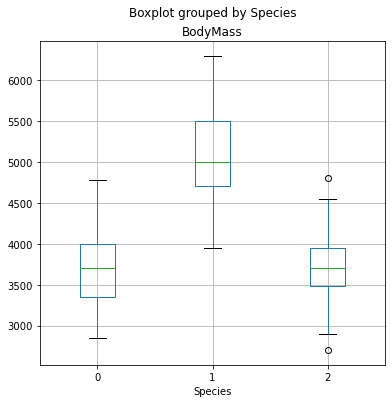

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split 

penguins_X, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values

x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X,
                                                                                   penguins_y, test_size=0.3,
                                                                                   random_state=42,
                                                                                   stratify=penguins_y)

In [27]:
print('training set: %d, test set: %d \n' % (x_penguin_train.shape[0], x_penguin_test.shape[0]))

training set: 239, test set: 103 



In [28]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='saga', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000, solver='saga')


In [29]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 1 0 1 1 1 1 0 0 1 0 1 0 1]
Actual labels   :  [0 1 0 1 1 1 1 1 0 0 1 0 1 0 1]


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        45
           1       0.79      0.81      0.80        37
           2       1.00      0.52      0.69        21

    accuracy                           0.79       103
   macro avg       0.84      0.74      0.77       103
weighted avg       0.81      0.79      0.78       103



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('overall accuracy: ', accuracy_score(y_penguin_test, penguin_predictions))
print('overall precision: ', precision_score(y_penguin_test, penguin_predictions, average='macro'))
print('overall recall: ', recall_score(y_penguin_test, penguin_predictions, average='macro'))

overall accuracy:  0.7864077669902912
overall precision:  0.843404808317089
overall recall:  0.7411697411697412


In [36]:
# the intersection of predicted and actual label values for each class

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[40  5  0]
 [ 7 30  0]
 [ 7  3 11]]


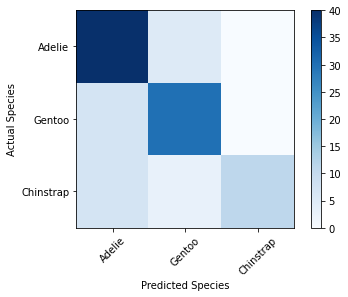

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

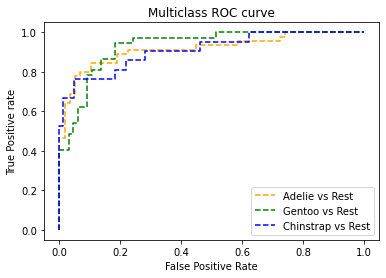

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

penguin_prob = multi_model.predict_proba(x_penguin_test)

fpr = {}
tpr = {}
thresh = {}

for i in range(len(penguin_classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_prob[:, i],pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


In [44]:
penguin_classes[2]

'Chinstrap'

In [49]:
auc = roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9183639692470642


# Preprocess data in a pipeline 

In [53]:
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# define preprocessing for 4 numeric columns
feature_columns = [0, 1, 2, 3] 
feature_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Create training pipeline 
preprocessor = ColumnTransformer(transformers=[('preprocess', feature_transformer, feature_columns)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])

multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print(multi_model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


In [54]:
penguin_pred = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr'))

Overall Accuracy: 0.7864077669902912
Overall Precision: 0.843404808317089
Overall Recall: 0.7411697411697412
Average AUC: 0.9996787127148775


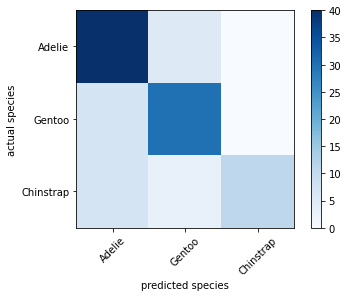

In [57]:
plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar() # colorbar to a plot
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel('predicted species')
plt.ylabel('actual species')
plt.show()

In [58]:
import joblib

# Save the model as a pickle file
filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']

In [59]:
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[50.4,15.3,224,5550]])
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
penguin_pred = multi_model.predict(x_new)[0]
print('Predicted class is', penguin_classes[penguin_pred])

New sample: [  50.4   15.3  224.  5550. ]
Predicted class is Gentoo


In [62]:
x_new = np.array([[49.5,18.4,195, 3600],
         [38.2,20.1,190,3900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] +')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Adelie)


In [63]:
penguin_classes

['Adelie', 'Gentoo', 'Chinstrap']